## EDA AND FEATURE ENGINEERING

In [46]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
directory_name = "cleaned_data"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [48]:
import os
import pandas as pd

path = 'cleaned_data'

# List comprehension to get all CSV file paths in the directory
csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

# Reading all CSV files into a list of dataframes
dfs = [pd.read_csv(f) for f in csv_files]

# Concatenating dataframes and then grouping by 'DATE' to sum the values
df_final = pd.concat(dfs).groupby('DATE').sum().reset_index()

# Optionally, you can sort the final dataframe by 'DATE'
df_final = df_final.sort_values('DATE').reset_index(drop=True)

print(df_final)


           DATE     MSPUS   income  new_private_house  PPI_Concrete  \
0    1987-01-01   97900.0   3820.2             1862.0       109.300   
1    1987-02-01   97900.0   3845.0             1771.0       109.300   
2    1987-03-01   97900.0   3863.8             1694.0       109.300   
3    1987-04-01  103400.0   3875.4             1735.0       109.300   
4    1987-05-01  103400.0   3908.6             1713.0       108.700   
..          ...       ...      ...                ...           ...   
434  2023-03-01  429000.0  22757.9             1528.0       333.027   
435  2023-04-01  418500.0  22815.8             1416.0       336.455   
436  2023-05-01  418500.0  22893.1             1534.0       336.455   
437  2023-06-01  418500.0  22941.5             1492.0       336.455   
438  2023-07-01  431000.0  22994.3             1334.0       336.455   

     home_ow_rate  new_private_hw_under  total_emp_cons  monthly_supply  \
0            63.9                1090.0          5007.0             6.0 

In [49]:
df_final.head()

,DATE,MSPUS,income,new_private_house,PPI_Concrete,home_ow_rate,new_private_hw_under,total_emp_cons,monthly_supply,mortgage_rate,...,house_st,p_saving_rate,unemployed_rate,target,all_Const_Emp,IPI_Cement,labor_percent,GDP,emratio,PPI_Cement
0,1987-01-01,97900.0,3820.2,1862.0,109.3,63.9,1090.0,5007.0,6.0,9.2040,...,1774.0,9.4,6.6,63.735,722.3,123.7373,65.4,4722.156,61.0,100.1
1,1987-02-01,97900.0,3845.0,1771.0,109.3,63.9,1096.0,5038.0,6.2,9.0825,...,1784.0,8.2,6.6,64.135,724.2,123.1670,65.5,4722.156,61.1,100.8
2,1987-03-01,97900.0,3863.8,1694.0,109.3,63.9,1084.0,5039.0,6.0,9.0350,...,1726.0,8.1,6.6,64.470,727.9,122.5706,65.5,4722.156,61.2,101.2
3,1987-04-01,103400.0,3875.4,1735.0,109.3,63.9,1079.0,5053.0,6.0,9.8325,...,1614.0,4.1,6.3,64.973,728.1,123.5345,65.4,4806.160,61.3,100.8
4,1987-05-01,103400.0,3908.6,1713.0,108.7,63.9,1070.0,5080.0,6.7,10.5960,...,1628.0,7.8,6.3,65.547,727.6,123.8454,65.7,4806.160,61.6,101.2


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   MSPUS                 439 non-null    float64
 2   income                439 non-null    float64
 3   new_private_house     439 non-null    float64
 4   PPI_Concrete          439 non-null    float64
 5   home_ow_rate          439 non-null    float64
 6   new_private_hw_under  439 non-null    float64
 7   total_emp_cons        439 non-null    float64
 8   monthly_supply        439 non-null    float64
 9   mortgage_rate         439 non-null    float64
 10  permit                439 non-null    float64
 11  population            439 non-null    float64
 12  house_st              439 non-null    float64
 13  p_saving_rate         439 non-null    float64
 14  unemployed_rate       439 non-null    float64
 15  target                4

In [51]:
df_final.describe()

,MSPUS,income,new_private_house,PPI_Concrete,home_ow_rate,new_private_hw_under,total_emp_cons,monthly_supply,mortgage_rate,permit,...,house_st,p_saving_rate,unemployed_rate,target,all_Const_Emp,IPI_Cement,labor_percent,GDP,emratio,PPI_Cement
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,219945.558087,11171.951708,1301.466970,179.159756,65.777221,954.018223,6288.307517,5.899772,6.315856,1355.164009,...,1337.020501,6.331435,5.776993,141.151487,742.157631,119.565531,65.113440,13236.389663,61.353531,176.834228
std,90045.171678,5197.803116,353.450626,51.907865,1.744104,289.464053,959.538073,1.740840,2.172124,390.759196,...,379.076753,2.888201,1.676957,60.304741,123.747671,23.911004,1.786754,5902.255151,2.067575,57.243653
min,97900.000000,3820.200000,520.000000,108.700000,63.100000,414.000000,4570.000000,3.300000,2.684000,513.000000,...,478.000000,1.400000,3.400000,63.735000,542.600000,66.350800,60.100000,4722.156000,51.300000,100.100000
25%,138000.000000,6539.100000,1088.500000,141.400000,64.100000,760.000000,5424.500000,4.500000,4.316250,1089.500000,...,1103.000000,4.900000,4.600000,81.733000,633.150000,101.180200,63.100000,7868.468000,59.750000,129.200000
50%,219000.000000,10464.100000,1333.000000,163.200000,65.500000,973.000000,6402.000000,5.600000,6.262000,1381.000000,...,1377.000000,6.100000,5.400000,141.048000,734.300000,116.904800,66.000000,12922.656000,61.900000,171.800000
75%,281000.000000,14724.800000,1546.000000,207.000000,67.400000,1123.000000,7092.000000,6.800000,7.838000,1624.000000,...,1582.500000,7.450000,6.600000,178.937000,826.250000,139.426100,66.500000,17518.508000,62.900000,210.050000
max,479500.000000,24471.800000,2245.000000,336.455000,69.400000,1710.000000,7967.000000,12.200000,11.260000,2263.000000,...,2273.000000,32.000000,14.700000,310.162000,1022.000000,192.032200,67.300000,27623.543000,64.700000,331.181000


### Plotting density plot for all the numerical features

<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

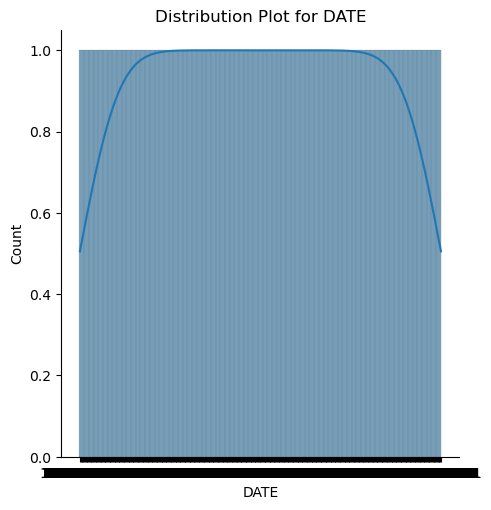

<Figure size 600x400 with 0 Axes>

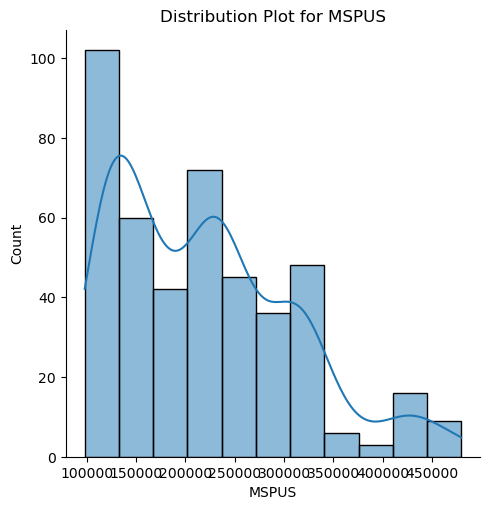

<Figure size 600x400 with 0 Axes>

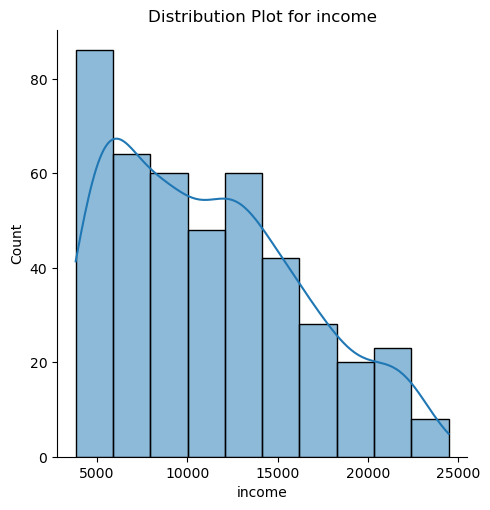

<Figure size 600x400 with 0 Axes>

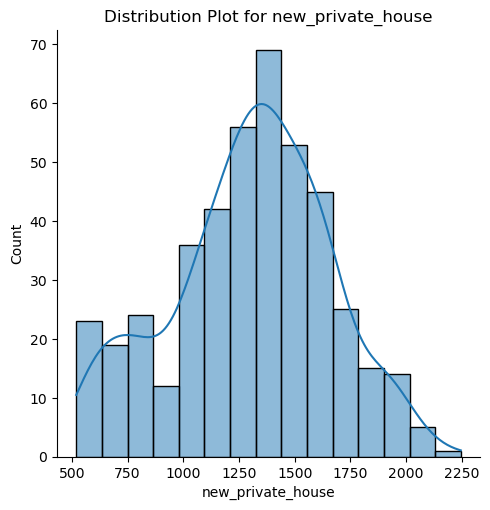

<Figure size 600x400 with 0 Axes>

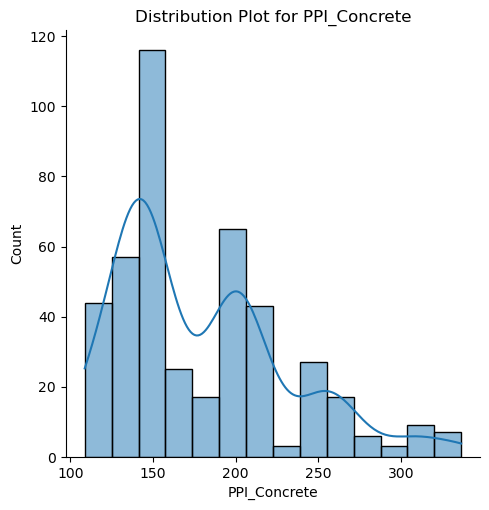

<Figure size 600x400 with 0 Axes>

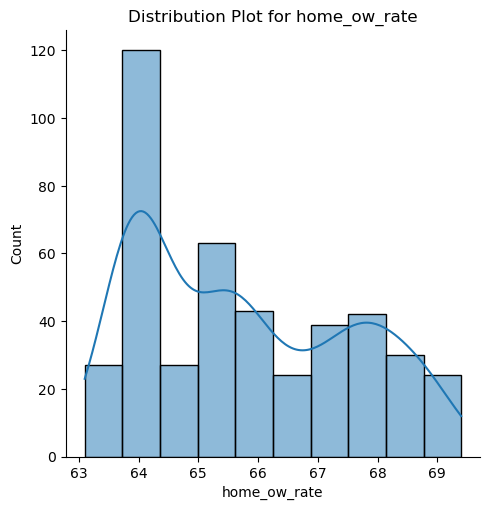

<Figure size 600x400 with 0 Axes>

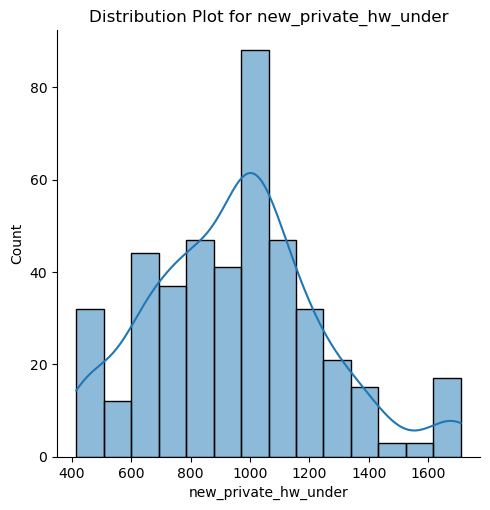

<Figure size 600x400 with 0 Axes>

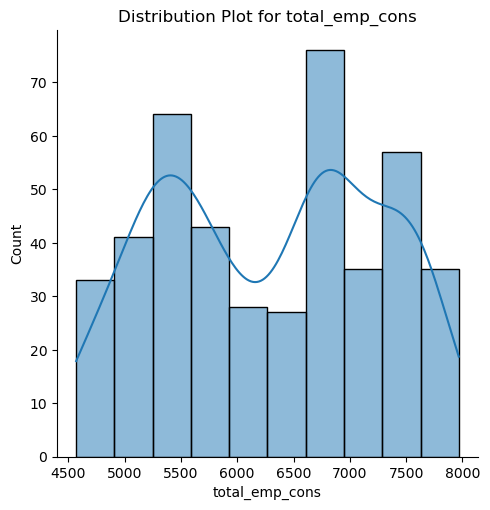

<Figure size 600x400 with 0 Axes>

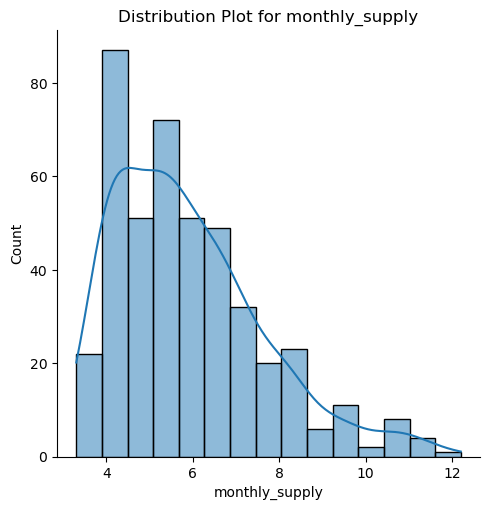

<Figure size 600x400 with 0 Axes>

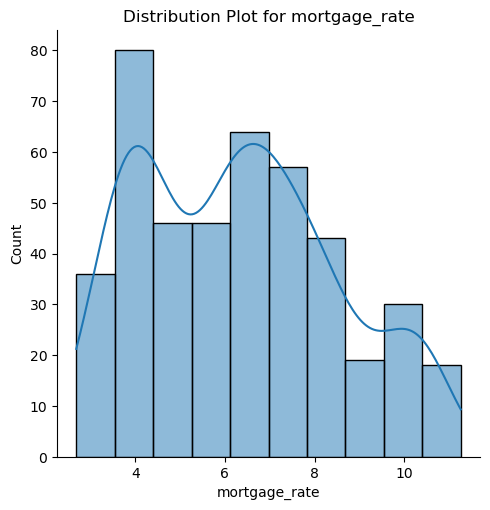

<Figure size 600x400 with 0 Axes>

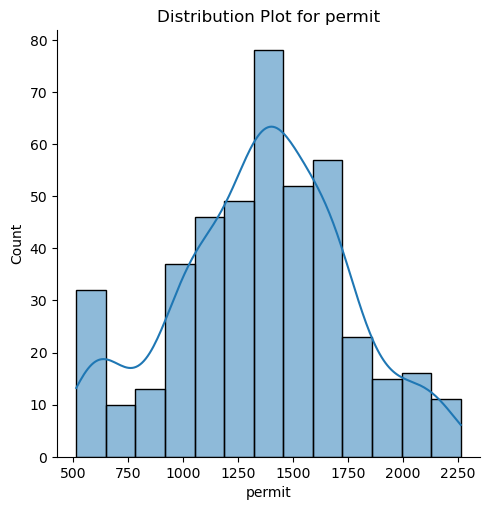

<Figure size 600x400 with 0 Axes>

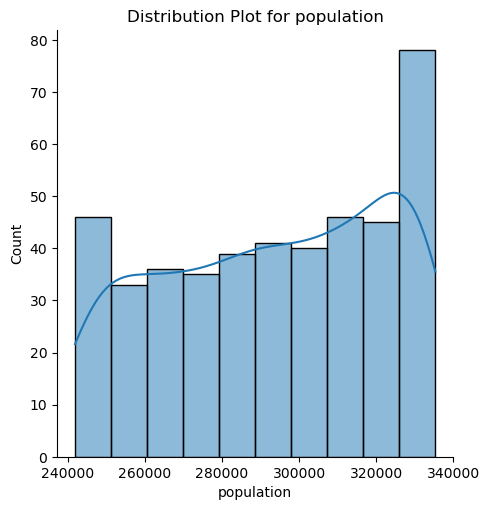

<Figure size 600x400 with 0 Axes>

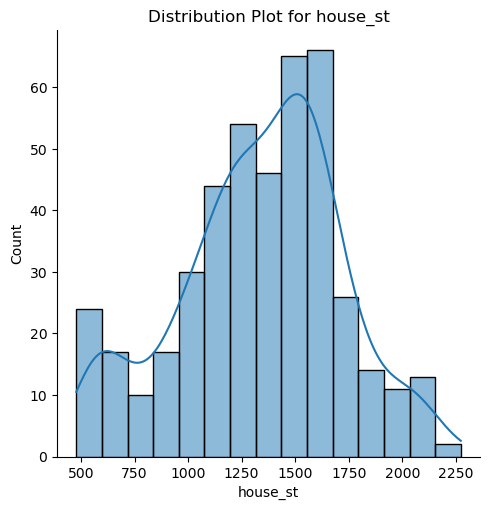

<Figure size 600x400 with 0 Axes>

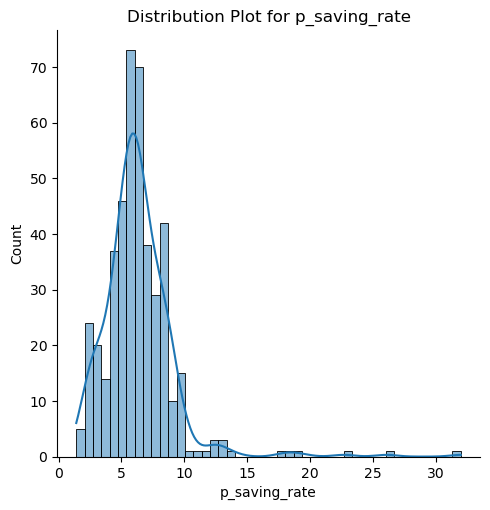

<Figure size 600x400 with 0 Axes>

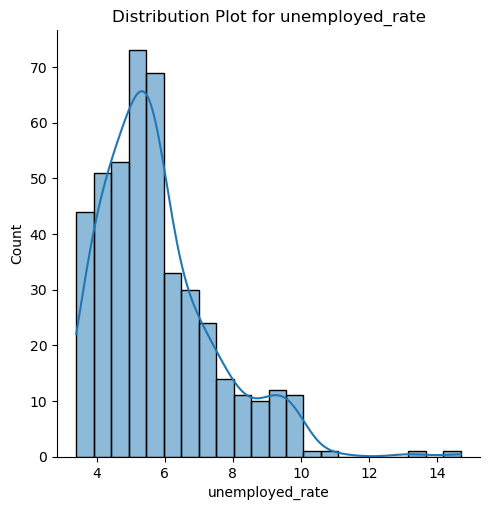

<Figure size 600x400 with 0 Axes>

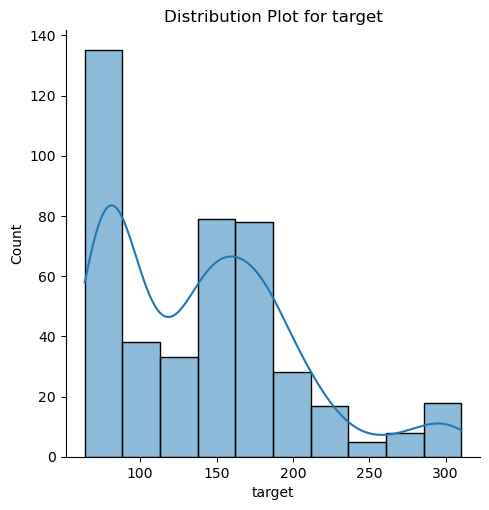

<Figure size 600x400 with 0 Axes>

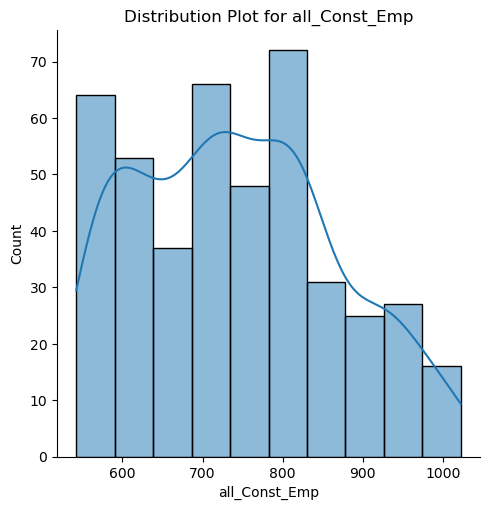

<Figure size 600x400 with 0 Axes>

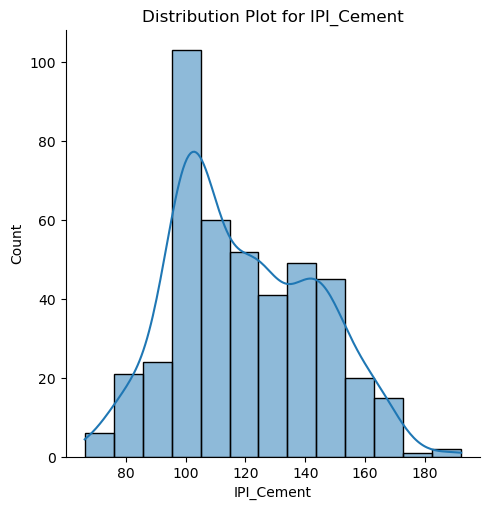

<Figure size 600x400 with 0 Axes>

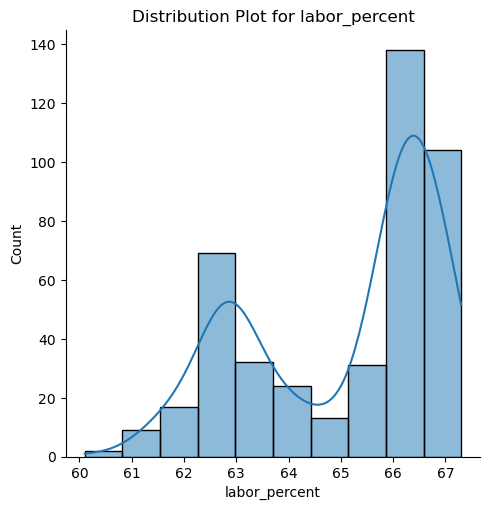

<Figure size 600x400 with 0 Axes>

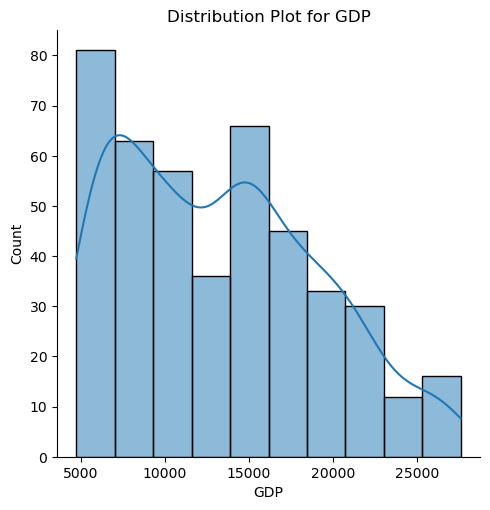

<Figure size 600x400 with 0 Axes>

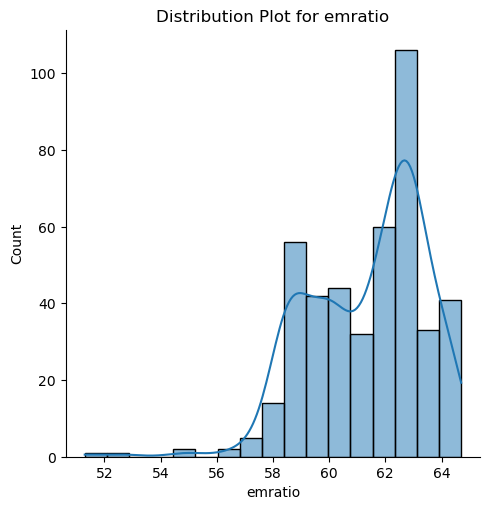

<Figure size 600x400 with 0 Axes>

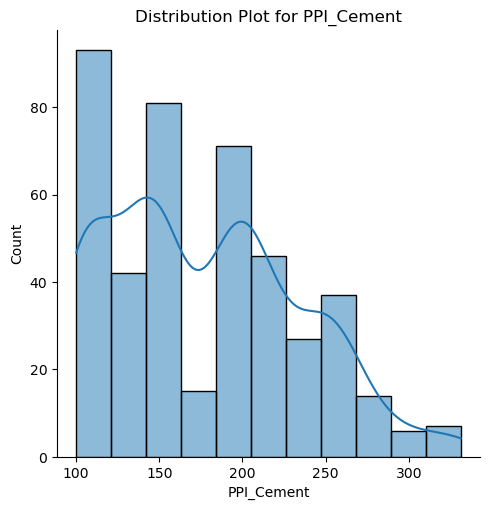

In [52]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

### Plotting boxplot for analyzing the outliers in the data

<Figure size 1200x600 with 0 Axes>

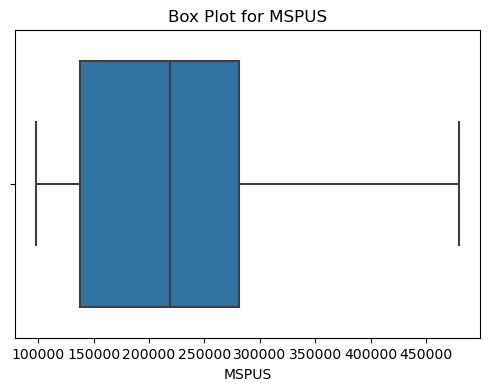

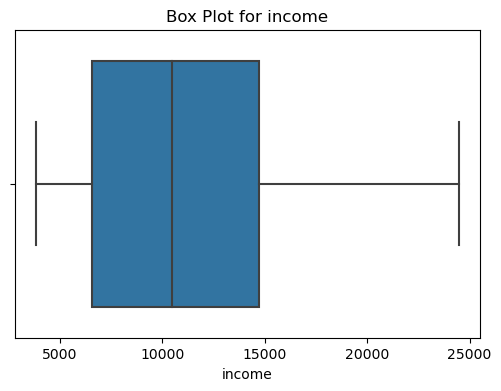

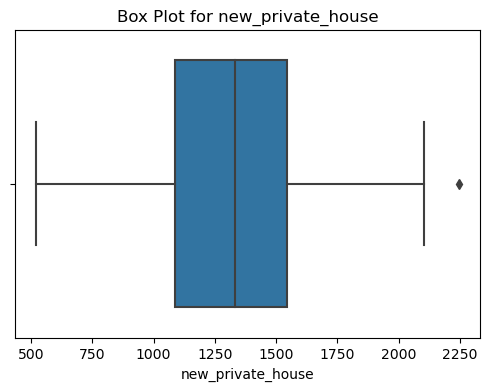

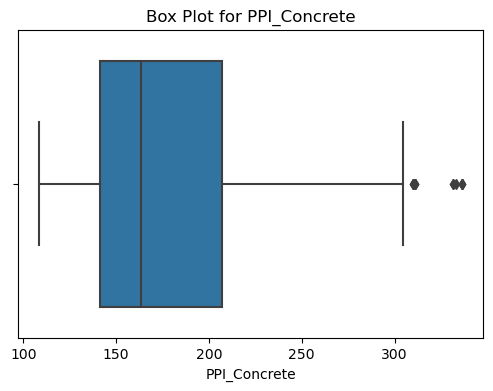

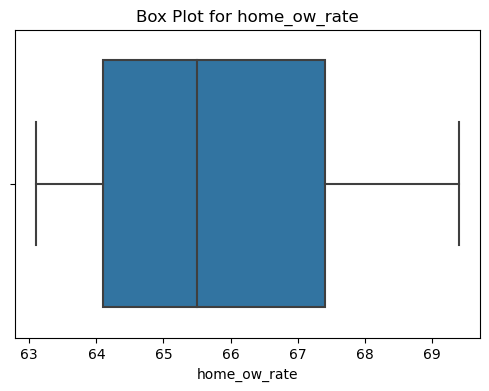

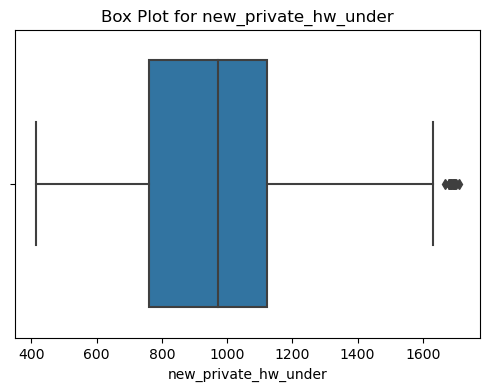

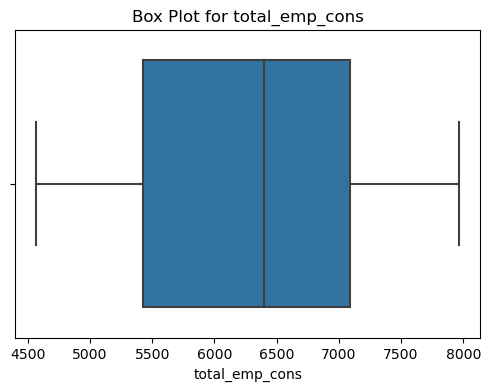

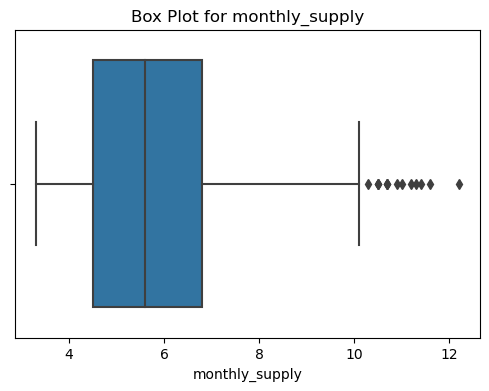

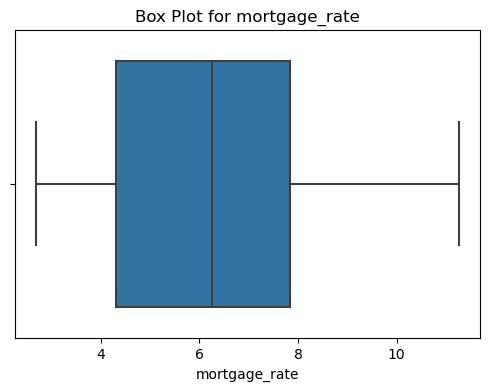

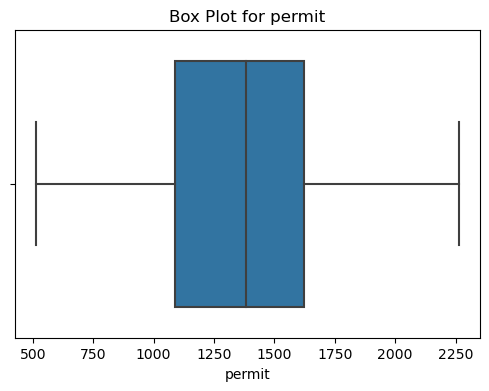

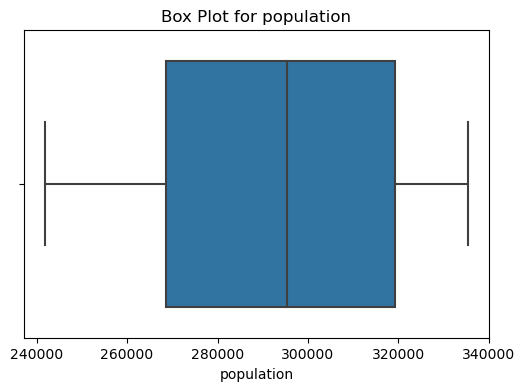

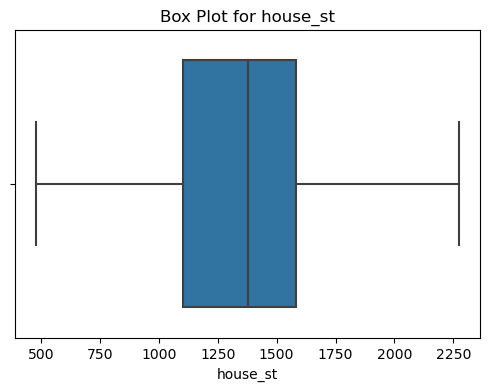

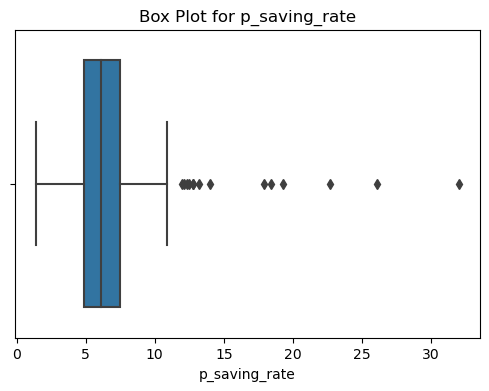

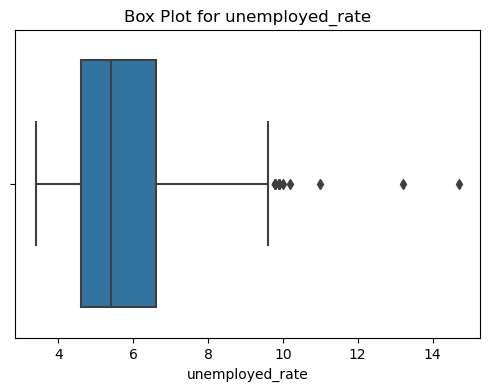

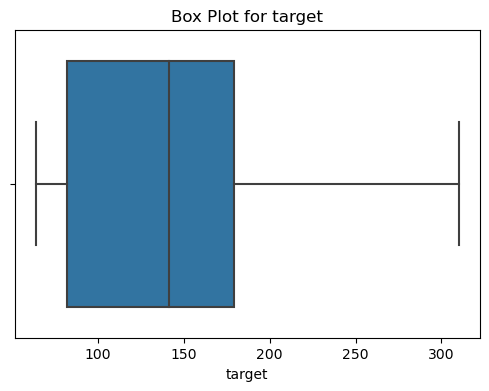

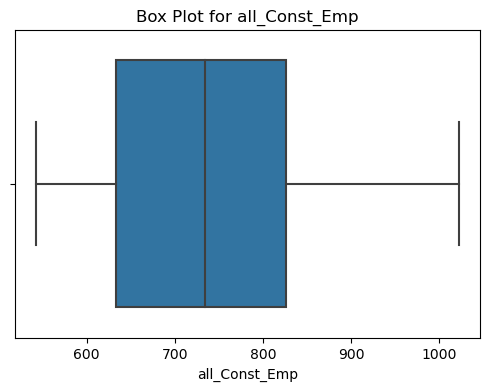

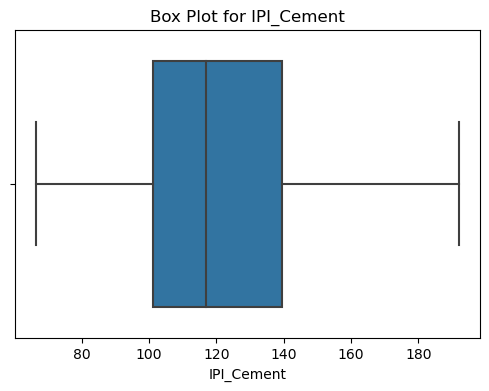

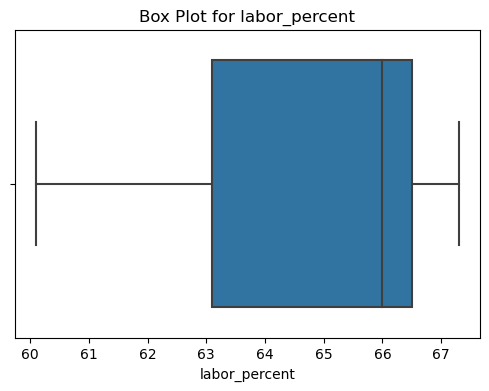

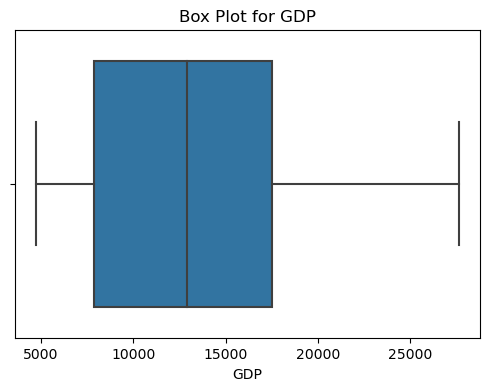

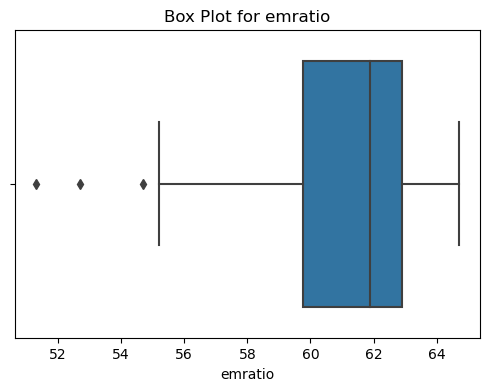

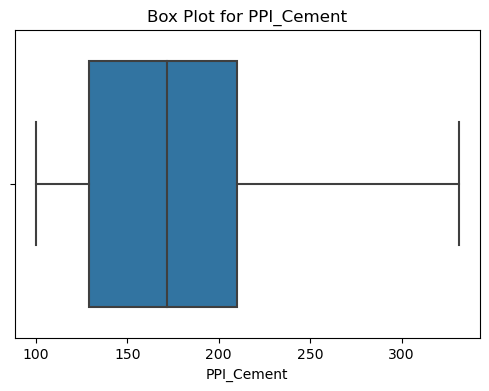

In [54]:
# Drop non-numeric columns for plotting
df_numeric = df_final.drop(columns=['DATE'])

plt.figure(figsize=(12, 6))  # This sets the size for the overall plot area

for col in df_numeric.columns.tolist():
    plt.figure(figsize=(6, 4))  # Set the figure size for each individual box plot
    sns.boxplot(data=df_numeric, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

**We have outliers in few features:**

- p_saving_rate
- PPI_Concrete
- new_private_house
- emratio
- new_private_hw_under
- monthly_supply
- unemployed_rate

### Treating Skewness and Outliers:

#### p_saving_rate

In [55]:
df_final['p_saving_rate'].skew()

3.3130896915520984

- Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [56]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

In [57]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0750000000000006
11.275


(None, None)

In [58]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

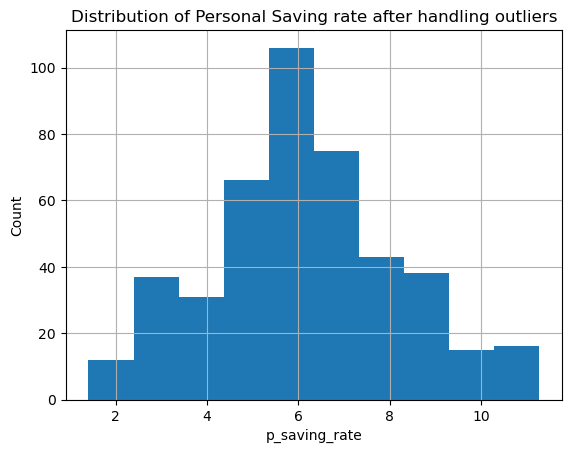

In [59]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

#### PPI_Concrete

In [60]:
df_final['PPI_Concrete'].skew()

0.9333165648577373

- Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

In [61]:
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])

<Axes: >

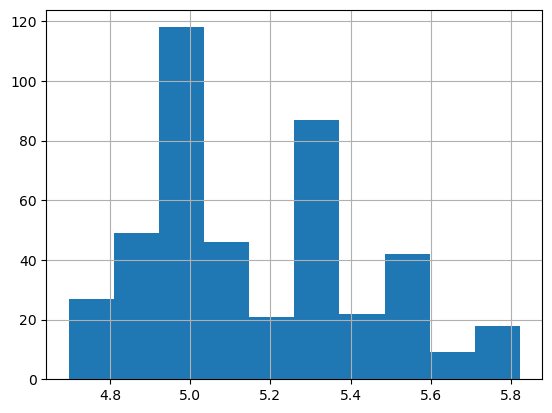

In [62]:
df_final['PPI_Concrete'].hist()

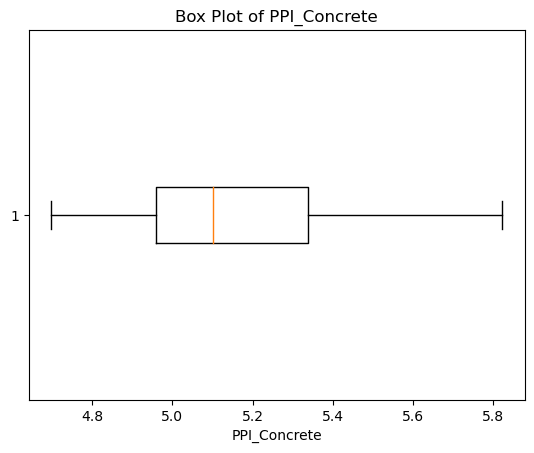

In [63]:
plt.boxplot(df_final['PPI_Concrete'], vert=False)
plt.xlabel('PPI_Concrete')
plt.title('Box Plot of PPI_Concrete')
plt.show()

- Skewness and outliers both removed by using log transformation.

#### new_private_house

In [64]:
df_final['new_private_house'].skew()

-0.21940615301839025

- New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply yeo-johnson transformation for removing skewness.

In [65]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

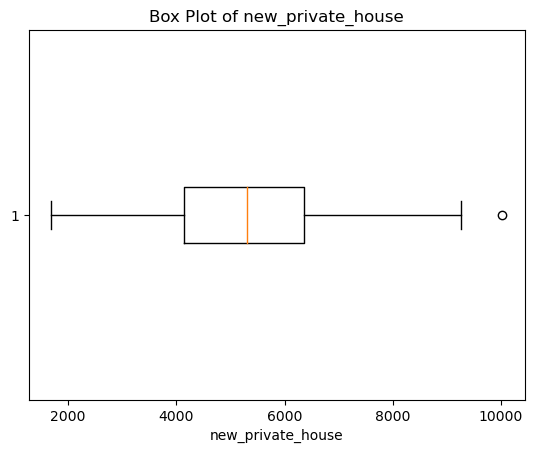

In [66]:
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [67]:
max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])


#### emratio

In [68]:
df_final['emratio'].skew()

-0.7538612695782946

- Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [69]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR =q2-q1

In [70]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

55.025000000000006
67.625


(None, None)

In [71]:
df_final.loc[df_final['emratio'] <=lower_bridge,'emratio'] = lower_bridge

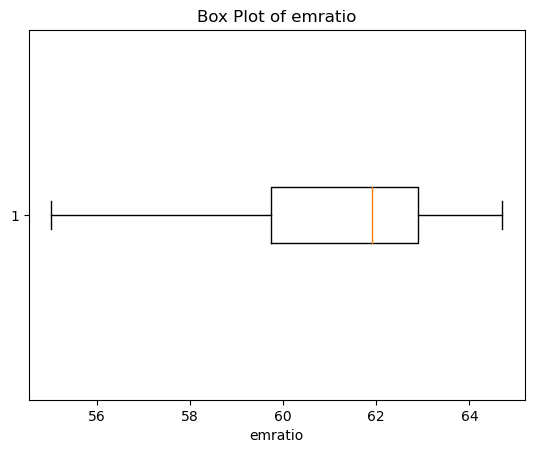

In [72]:
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('emratio')
plt.title('Box Plot of emratio')
plt.show()

#### new_private_hw_under

In [73]:
df_final['new_private_hw_under'].skew()

0.36887282115041053

- New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [74]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

In [75]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

215.5
1667.5


(None, None)

In [76]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

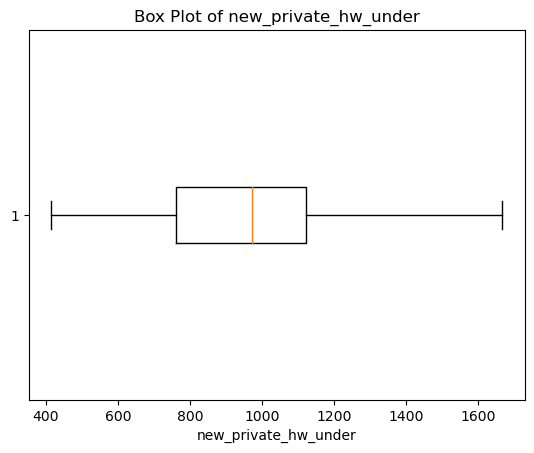

In [77]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

#### Monthly_supply

In [78]:
df_final['monthly_supply'].skew()

1.0003922160771488

- Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [79]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

In [80]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0500000000000003
10.25


(None, None)

In [81]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge

<Axes: >

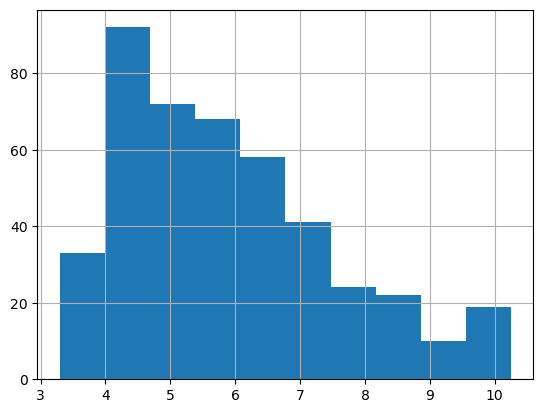

In [82]:
df_final['monthly_supply'].hist()

#### unemployed_rate

In [83]:
df_final['unemployed_rate'].skew()

1.2751925262720107

In [84]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [85]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.5999999999999996
9.6


(None, None)

In [86]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

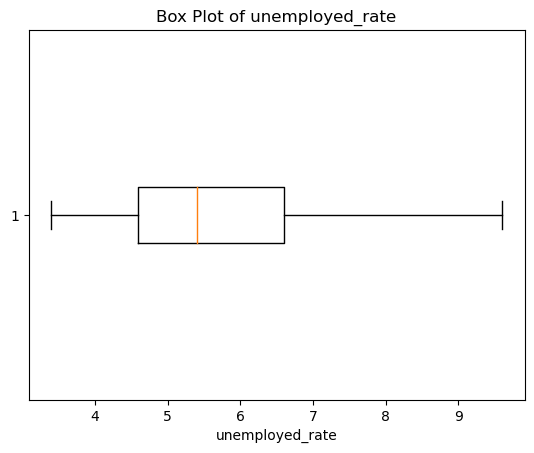

In [87]:
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

### Understanding the Correlations between the data

In [88]:
corr_matrix= df_final.corr()
corr_matrix['target'].sort_values(ascending=False)

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_6737/2472906699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df_final.corr()


target                  1.000000
MSPUS                   0.980144
PPI_Cement              0.964074
GDP                     0.960633
income                  0.955608
PPI_Concrete            0.939072
population              0.896974
total_emp_cons          0.812130
new_private_hw_under    0.634935
all_Const_Emp           0.560479
home_ow_rate            0.207294
monthly_supply          0.169504
permit                  0.127189
house_st               -0.001742
new_private_house      -0.068468
unemployed_rate        -0.249211
IPI_Cement             -0.260807
p_saving_rate          -0.286001
emratio                -0.538776
mortgage_rate          -0.730709
labor_percent          -0.788313
Name: target, dtype: float64

### Checking Multicollinearity

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming df_final has a 'DATE' column which should be excluded from VIF calculation
df_features = df_final.drop(columns=['DATE'])

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns

vif_data["VIF"] = [variance_inflation_factor(df_features.values, i)
                   for i in range(df_features.shape[1])]

print(vif_data)


                 feature            VIF
0                  MSPUS    1179.495359
1                 income    2182.585160
2      new_private_house     258.529610
3           PPI_Concrete   45709.736368
4           home_ow_rate   29878.949586
5   new_private_hw_under     716.831769
6         total_emp_cons    5181.932995
7         monthly_supply      83.333376
8          mortgage_rate     229.214974
9                 permit     557.943594
10            population   21683.542273
11              house_st     531.101441
12         p_saving_rate      50.163101
13       unemployed_rate    4024.141108
14                target    1410.107395
15         all_Const_Emp    2206.480911
16            IPI_Cement     347.888327
17         labor_percent  838701.176552
18                   GDP    4057.674895
19               emratio  824497.061929
20            PPI_Cement    1345.402025


We have high multicollinearity in our data. Need to handle this before fedding into the model

In [90]:
df_final.to_csv("df_final.csv")